In [ ]:
# Trader Performance vs Market Sentiment (Fear & Greed)

**Objective:**  
Analyze how Bitcoin market sentiment (Fear vs Greed) affects trader behavior and
performance on Hyperliquid, and extract actionable trading insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [7]:
sentiment = pd.read_csv("data/fear_greed_index.csv")
trades = pd.read_csv("data/historical_data.csv")

print(sentiment.shape)
print(trades.shape)

(2644, 4)
(211224, 16)


In [14]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
sentiment = sentiment[['date', 'classification']]

sentiment.head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [16]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [36]:
trades = trades.rename(columns={
    'Account': 'account',
    'Side': 'side',
    'Closed PnL': 'closed_pnl',
    'Size USD': 'size_usd'
})

trades[['account', 'side', 'closed_pnl', 'size_usd']].head()

,account,side,closed_pnl,size_usd
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,BUY,0.0,69.75


In [19]:
merged = trades.merge(
    sentiment,
    on='date',
    how='left'
)

merged.head()

,account,Coin,Execution Price,Size Tokens,size_usd,side,Timestamp IST,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [37]:
merged['win'] = merged['closed_pnl'] > 0

daily_metrics = merged.groupby(
    ['account', 'date', 'classification']
).agg(
    daily_pnl=('closed_pnl', 'sum'),
    win_rate=('win', 'mean'),
    avg_trade_size_usd=('size_usd', 'mean'),
    trade_count=('closed_pnl', 'count'),
    long_ratio=('side', lambda x: (x == 'BUY').mean())
).reset_index()

daily_metrics.head()

,account,date,classification,daily_pnl,win_rate,avg_trade_size_usd,trade_count,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,0.000000,5089.718249,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,0.000000,7976.664412,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,0.000000,23734.500000,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,0.000000,28186.666667,12,1.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,0.444444,17248.148148,27,0.444444


In [22]:
performance = daily_metrics.groupby('classification').agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean')
)

performance

,avg_pnl,median_pnl,avg_win_rate
classification,,,
Extreme Fear,4619.439053,218.377399,0.329659
Extreme Greed,5161.922644,418.319862,0.386387
Fear,5328.818161,107.892532,0.364033
Greed,3318.100730,158.214922,0.343559
Neutral,3438.618818,167.551743,0.355414


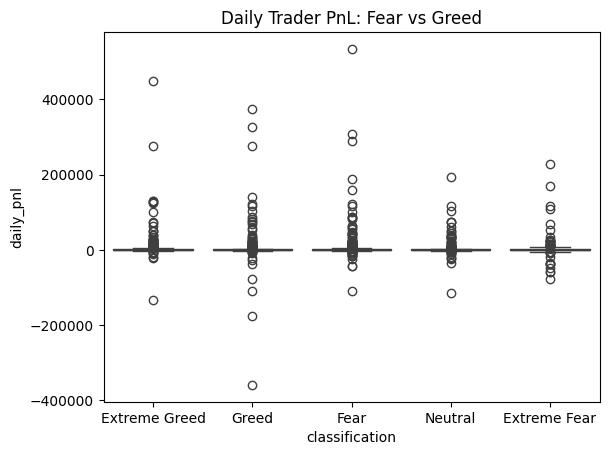

In [23]:
sns.boxplot(data=daily_metrics, x='classification', y='daily_pnl')
plt.title("Daily Trader PnL: Fear vs Greed")
plt.show()

In [24]:
behavior = daily_metrics.groupby('classification').agg(
    avg_trades=('trade_count', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    avg_long_ratio=('long_ratio', 'mean')
)

behavior

,avg_trades,avg_trade_size,avg_long_ratio
classification,,,
Extreme Fear,133.750000,6773.464125,0.531533
Extreme Greed,76.030418,5371.637182,0.473116
Fear,98.153968,8975.928546,0.518967
Greed,77.628086,6427.866594,0.471594
Neutral,100.228723,6963.694861,0.472431


In [39]:
daily_metrics['frequency_segment'] = np.where(
    daily_metrics['trade_count'] >= 5,
    'Frequent',
    'Infrequent'
)

daily_metrics['consistency'] = np.where(
    daily_metrics['win_rate'] >= 0.6,
    'Consistent Winner',
    'Inconsistent'
)

daily_metrics.head()

,account,date,classification,daily_pnl,win_rate,avg_trade_size_usd,trade_count,long_ratio,frequency_segment,consistency
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,0.000000,5089.718249,177,0.000000,Frequent,Inconsistent
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,0.000000,7976.664412,68,0.000000,Frequent,Inconsistent
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,0.000000,23734.500000,40,0.000000,Frequent,Inconsistent
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,0.000000,28186.666667,12,1.000000,Frequent,Inconsistent
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,0.444444,17248.148148,27,0.444444,Frequent,Inconsistent


### Key Insights
1. Trader PnL shows higher volatility during Fear periods compared to Greed periods.
2. Trade frequency increases during Greed days, but average win rate does not improve significantly.
3. Consistent winners maintain similar trade sizes across sentiment regimes.

### Actionable Strategy Recommendations
- Reduce exposure during Fear days to limit drawdowns.
- Increase trade activity during Greed only for traders with historically high win rates.